In [1]:
## Aug/15/17

## Convolutional Neural Network on tensorflow-gpu
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
 
# Dependency imports

import time
import os
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import biosppy as bp

## Load data
ab = pd.read_csv('output_fullData_names_labels.csv', header=None)

XLen = ab.shape[1]


Using TensorFlow backend.


In [2]:

X0 = ab.ix[:,2: XLen ]
X1 = X0.diff(axis=1)
index = ab[0]
y1 = ab[1]



## Cast to 32bit
y = y1.values.astype(np.int32)
X = X1.values.astype(np.float32)

## Set NaNs to 10e-6
X[np.isnan(X)] = 0

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [3]:
## pip install pandas sklearn mataplotlib
X_scaled = preprocessing.scale(X, axis=1)

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X.T)
scaled_X = scaler.transform(X.T).T

from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=1)

from numpy import array
from numpy import argmax
from keras.utils import to_categorical

## Feature Scaling and split the data into training and test sets

## Convert label to one hot format

y_1Hot_train = to_categorical(y_train)
y_1Hot_test = to_categorical(y_test)
#y_1Hot_val = to_categorical(y_val)

# y_1Hot_train = tf.one_hot(y_train, 4)
# y_1Hot_test = tf.one_hot(y_test, 4)

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=config))

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [4]:
## count number of test samples
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 4047, 1: 576, 2: 1970, 3: 229}

C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


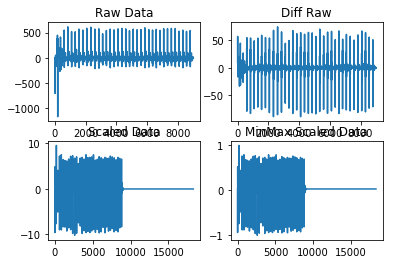

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Raw Data')
ax2.title.set_text('Diff Raw')
ax3.title.set_text('Scaled Data')
ax4.title.set_text('MinMax Scaled Data')

ax1.plot(X0.ix[1])
ax2.plot(X1.ix[1].diff())
ax3.plot( X_scaled[1] )
ax4.plot( scaled_X[1] )

plt.show()

In [6]:
# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [7]:
X_train.shape

(6822, 18286, 1)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
#     cbar = plt.colorbar(fraction=0.046, pad=0.04)
#     cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size



In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
model = Sequential()

model.add(Conv1D(256, 18,  init='uniform', input_shape=X_train.shape[1:3]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(32, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(32, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(16, 18,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(GlobalAveragePooling1D())
#model.add(MaxPooling1D(pool_size=2))

#model.add(LSTM(160, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))

#model.add(LSTM(4, dropout=0.2, recurrent_dropout=0.2, activation='softmax'))
model.add(Dense(4, activation='softmax'))

# # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 18, kernel_initializer="uniform", input_shape=(18286, 1))`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 18, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 18, kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 18, kernel_initializer="uniform")`
C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Conv1D` 

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18269, 256)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 18269, 256)        1024      
_________________________________________________________________
activation_1 (Activation)    (None, 18269, 256)        0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9134, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9134, 256)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9117, 256)         1179904   
_________________________________________________________________
batch_normalization_2 (Batch (None, 9117, 256)         1024      
__________

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# serialize model to YAML

class_weight = {0 : 1.,
    1: 6.,
    2: 2,
    3: 10
               
               }

model_yaml = model.to_yaml()
with open("model_v8v6_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# checkpoint
filepath="weights.bestv8v6.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', patience=40)
callbacks_list = [checkpoint, early_stopping]

# Fit the model
history = model.fit(X_train, y_1Hot_train, epochs=3000, validation_split=0.1 , class_weight=class_weight,callbacks=callbacks_list, shuffle=True, batch_size=5)


# serialize weights to HDF5
model.save_weights("weights_v8v6_layer_cnn.h5")
print("Saved model to disk")

Train on 6139 samples, validate on 683 samples
Epoch 1/3000


In [ ]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv8v6.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0, batch_size=5)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test, batch_size=5)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)

Loaded model from disk
acc: 87.35%
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       262
          1       0.92      0.89      0.91        38
          2       0.87      0.71      0.78       116
          3       0.55      0.55      0.55        11

avg / total       0.87      0.87      0.87       427



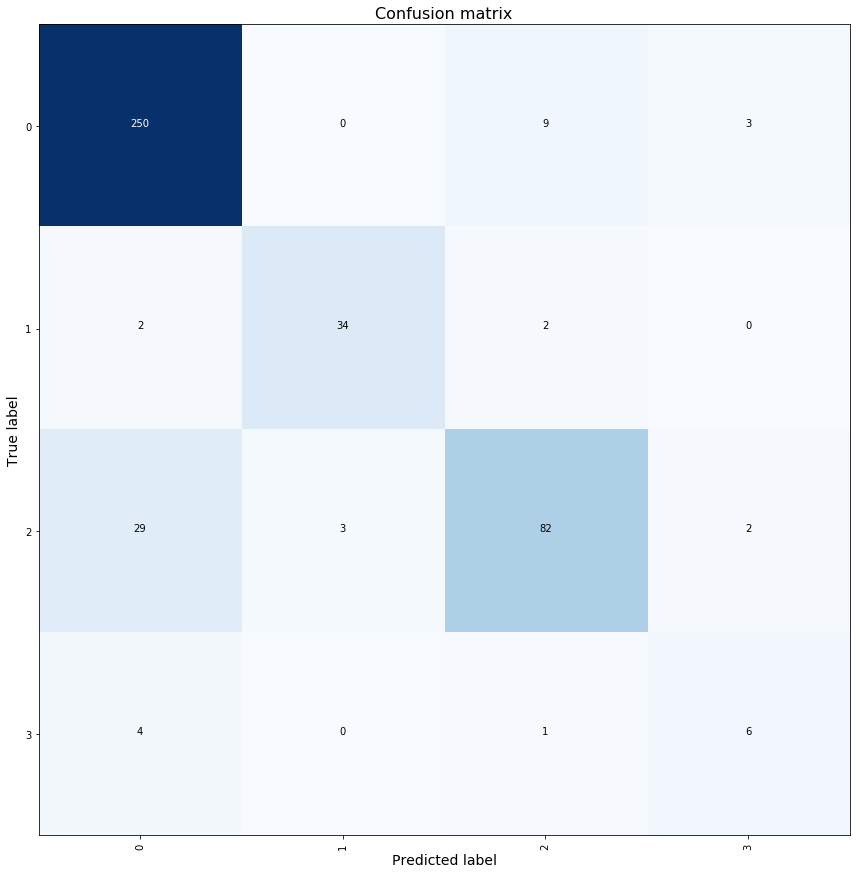

In [164]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv8v5.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0, batch_size=5)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test, batch_size=5)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)

Loaded model from disk
acc: 85.48%
             precision    recall  f1-score   support

          0       0.88      0.94      0.91       262
          1       0.94      0.79      0.86        38
          2       0.78      0.75      0.77       116
          3       0.60      0.27      0.37        11

avg / total       0.85      0.86      0.85       427



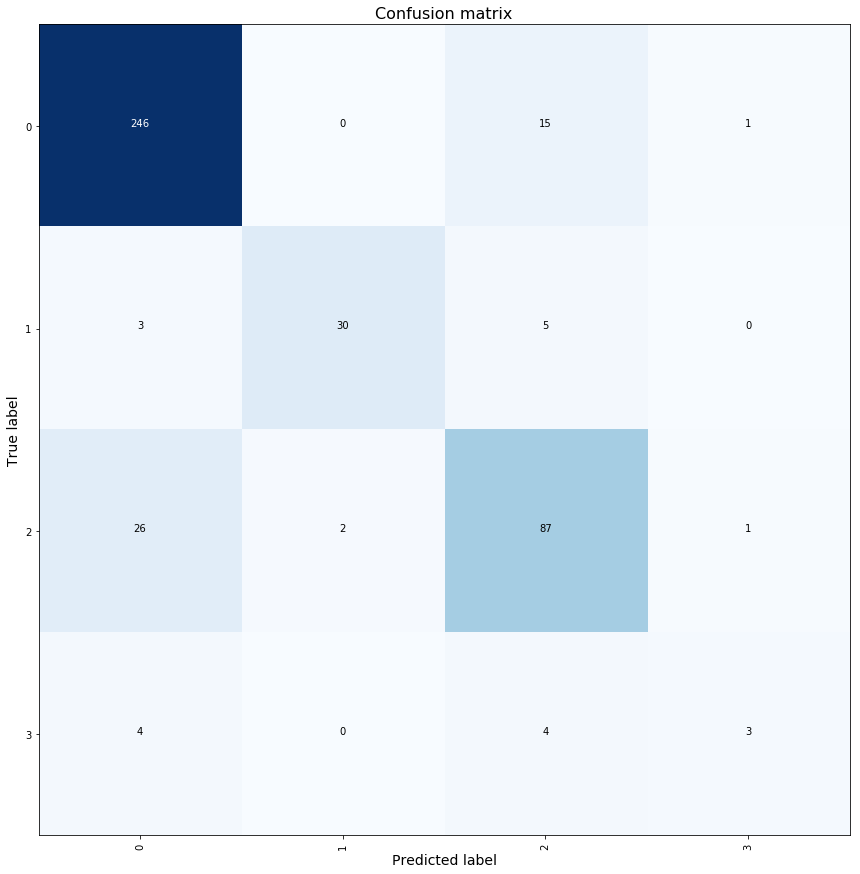

In [158]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv8v4b.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0, batch_size=10)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test, batch_size=10)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)

In [128]:
##### from keras.callbacks import EarlyStopping, ModelCheckpoint
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model_v8v3_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# checkpoint
filepath="weights.bestv8v3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', patience=150)
callbacks_list = [checkpoint, early_stopping]

# Fit the model
history = model.fit(X_train, y_1Hot_train, epochs=3000, validation_split=0.2 , callbacks=callbacks_list, shuffle=True, batch_size=32)


# serialize weights to HDF5
model.save_weights("weights_v8v3_layer_cnn.h5")
print("Saved model to disk")

Train on 6480 samples, validate on 1621 samples
Epoch 1/3000
6480/6480 [==============================] - 115s - loss: 1.3805 - acc: 0.5858 - val_loss: 1.4265 - val_acc: 0.6046
Epoch 2/3000
6480/6480 [==============================] - 66s - loss: 1.3823 - acc: 0.5901 - val_loss: 1.4299 - val_acc: 0.6046
Epoch 3/3000
6480/6480 [==============================] - 66s - loss: 1.0178 - acc: 0.5910 - val_loss: 0.9118 - val_acc: 0.6169
Epoch 4/3000
6480/6480 [==============================] - 66s - loss: 0.9612 - acc: 0.5948 - val_loss: 1.0784 - val_acc: 0.6107
Epoch 5/3000
6480/6480 [==============================] - 66s - loss: 0.8884 - acc: 0.6142 - val_loss: 0.8211 - val_acc: 0.6798
Epoch 6/3000
6480/6480 [==============================] - 66s - loss: 0.8819 - acc: 0.6489 - val_loss: 0.9892 - val_acc: 0.6299
Epoch 7/3000
6480/6480 [==============================] - 66s - loss: 0.8014 - acc: 0.6767 - val_loss: 0.8190 - val_acc: 0.6638
Epoch 8/3000
6480/6480 [==============================]

6480/6480 [==============================] - 65s - loss: 0.5658 - acc: 0.7733 - val_loss: 0.6823 - val_acc: 0.7557
Epoch 32/3000
6480/6480 [==============================] - 66s - loss: 0.5692 - acc: 0.7662 - val_loss: 0.5967 - val_acc: 0.7699
Epoch 33/3000
6480/6480 [==============================] - 67s - loss: 0.5457 - acc: 0.7779 - val_loss: 0.5710 - val_acc: 0.7742
Epoch 34/3000
6480/6480 [==============================] - 68s - loss: 0.5457 - acc: 0.7867 - val_loss: 0.6127 - val_acc: 0.7872
Epoch 35/3000
6480/6480 [==============================] - 68s - loss: 0.6089 - acc: 0.7588 - val_loss: 0.7469 - val_acc: 0.6761
Epoch 36/3000
6480/6480 [==============================] - 68s - loss: 0.5597 - acc: 0.7687 - val_loss: 0.6198 - val_acc: 0.7816
Epoch 37/3000
6480/6480 [==============================] - 68s - loss: 0.5504 - acc: 0.7923 - val_loss: 0.7621 - val_acc: 0.7594
Epoch 38/3000
6480/6480 [==============================] - 69s - loss: 0.5321 - acc: 0.7977 - val_loss: 0.5959 

6480/6480 [==============================] - 66s - loss: 0.4343 - acc: 0.8403 - val_loss: 0.5031 - val_acc: 0.8304
Epoch 63/3000
6480/6480 [==============================] - 66s - loss: 0.4282 - acc: 0.8474 - val_loss: 0.6024 - val_acc: 0.8137
Epoch 64/3000
6480/6480 [==============================] - 66s - loss: 0.4355 - acc: 0.8512 - val_loss: 0.5225 - val_acc: 0.8297
Epoch 65/3000
6480/6480 [==============================] - 66s - loss: 0.4395 - acc: 0.8452 - val_loss: 1.1079 - val_acc: 0.5182
Epoch 66/3000
6480/6480 [==============================] - 66s - loss: 0.4486 - acc: 0.8364 - val_loss: 0.5644 - val_acc: 0.8236
Epoch 67/3000
6480/6480 [==============================] - 66s - loss: 0.4206 - acc: 0.8488 - val_loss: 0.5312 - val_acc: 0.8242
Epoch 68/3000
6480/6480 [==============================] - 66s - loss: 0.4205 - acc: 0.8528 - val_loss: 0.5476 - val_acc: 0.8211
Epoch 69/3000
6480/6480 [==============================] - 66s - loss: 0.4205 - acc: 0.8525 - val_loss: 0.5172 

6480/6480 [==============================] - 63s - loss: 0.4095 - acc: 0.8582 - val_loss: 0.4840 - val_acc: 0.8267
Epoch 128/3000
6480/6480 [==============================] - 64s - loss: 0.4121 - acc: 0.8549 - val_loss: 0.4846 - val_acc: 0.8316
Epoch 129/3000
6480/6480 [==============================] - 64s - loss: 0.4000 - acc: 0.8603 - val_loss: 0.5399 - val_acc: 0.8359
Epoch 130/3000
6480/6480 [==============================] - 64s - loss: 0.3964 - acc: 0.8625 - val_loss: 0.4822 - val_acc: 0.8359
Epoch 131/3000
6480/6480 [==============================] - 64s - loss: 0.4016 - acc: 0.8565 - val_loss: 0.6088 - val_acc: 0.8322
Epoch 132/3000
6480/6480 [==============================] - 64s - loss: 0.3856 - acc: 0.8656 - val_loss: 0.5912 - val_acc: 0.8322
Epoch 133/3000
6480/6480 [==============================] - 63s - loss: 0.4687 - acc: 0.8451 - val_loss: 0.5216 - val_acc: 0.8316
Epoch 134/3000
6480/6480 [==============================] - 64s - loss: 0.4170 - acc: 0.8648 - val_loss: 

6480/6480 [==============================] - 64s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 193/3000
6480/6480 [==============================] - 64s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 194/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 195/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 196/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 197/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 198/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 199/3000
6480/6480 [=======================

6480/6480 [==============================] - 64s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 256/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 257/3000
6480/6480 [==============================] - 64s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 258/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 259/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 260/3000
6480/6480 [==============================] - 64s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 261/3000
6480/6480 [==============================] - 63s - loss: 1.1921e-07 - acc: 0.5877 - val_loss: 1.1921e-07 - val_acc: 0.6046
Epoch 262/3000
6480/6480 [=======================

KeyboardInterrupt: 

In [117]:
##### from keras.callbacks import EarlyStopping, ModelCheckpoint
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model_v8v3_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# checkpoint
filepath="weights.bestv8v3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', patience=150)
callbacks_list = [checkpoint, early_stopping]

# Fit the model
history = model.fit(X_train, y_1Hot_train, epochs=3000, validation_split=0.2 , callbacks=callbacks_list, shuffle=True, batch_size=64)


# serialize weights to HDF5
model.save_weights("weights_v8v3_layer_cnn.h5")
print("Saved model to disk")

Train on 6480 samples, validate on 1621 samples
Epoch 1/3000
6480/6480 [==============================] - 69s - loss: 0.8985 - acc: 0.6188 - val_loss: 1.6439 - val_acc: 0.0531
Epoch 2/3000
6480/6480 [==============================] - 23s - loss: 0.7571 - acc: 0.6823 - val_loss: 0.9341 - val_acc: 0.5959
Epoch 3/3000
6480/6480 [==============================] - 23s - loss: 0.6971 - acc: 0.7077 - val_loss: 0.6718 - val_acc: 0.7199
Epoch 4/3000
6480/6480 [==============================] - 23s - loss: 0.6439 - acc: 0.7312 - val_loss: 0.7257 - val_acc: 0.7008
Epoch 5/3000
6480/6480 [==============================] - 23s - loss: 0.6366 - acc: 0.7352 - val_loss: 0.6676 - val_acc: 0.7397
Epoch 6/3000
6480/6480 [==============================] - 23s - loss: 0.6167 - acc: 0.7421 - val_loss: 0.9289 - val_acc: 0.6157
Epoch 7/3000
6480/6480 [==============================] - 23s - loss: 0.5821 - acc: 0.7574 - val_loss: 0.6999 - val_acc: 0.7526
Epoch 8/3000
6480/6480 [==============================] 

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
model = Sequential()

model.add(Conv1D(64, 5,  init='uniform', input_shape=X_train.shape[1:3]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(64, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(128, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Conv1D(256, 5,  init='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

#model.add(GlobalAveragePooling1D())
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(4, activation='softmax'))

# # Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Loaded model from disk
acc: 86.65%
             precision    recall  f1-score   support

          0       0.84      0.96      0.89       262
          1       0.94      0.87      0.90        38
          2       0.86      0.64      0.73       116
          3       1.00      0.55      0.71        11

avg / total       0.86      0.85      0.85       427



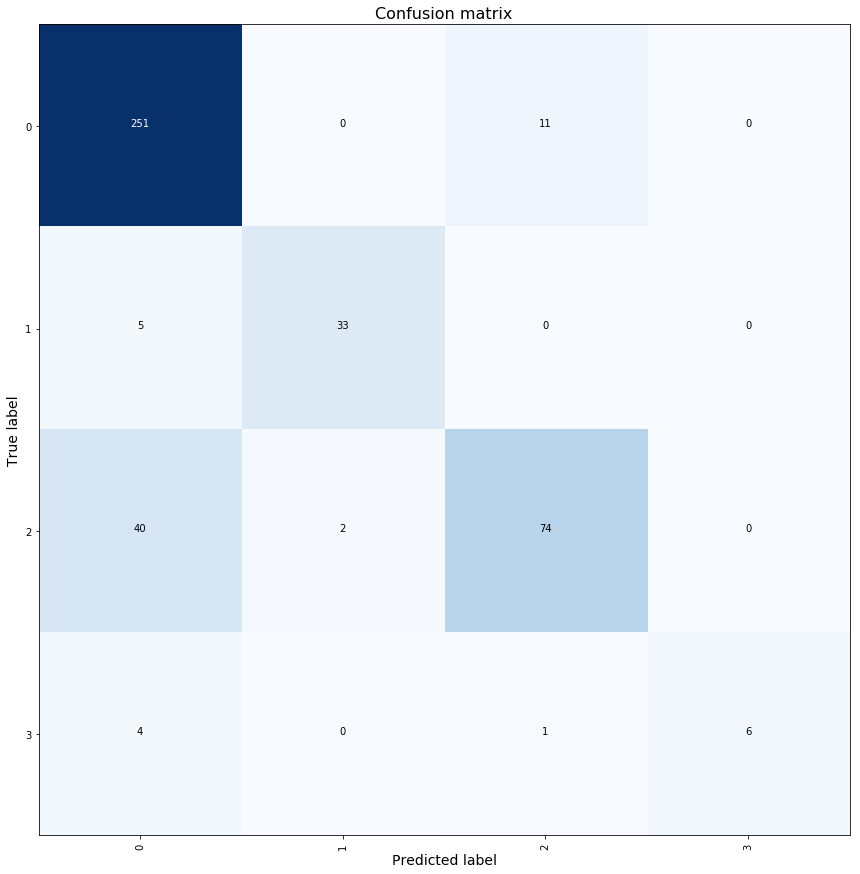

In [129]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv8v3.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)

Loaded model from disk
acc: 86.89%
             precision    recall  f1-score   support

          0       0.88      0.96      0.92       262
          1       0.87      0.87      0.87        38
          2       0.84      0.70      0.76       116
          3       0.80      0.36      0.50        11

avg / total       0.86      0.87      0.86       427



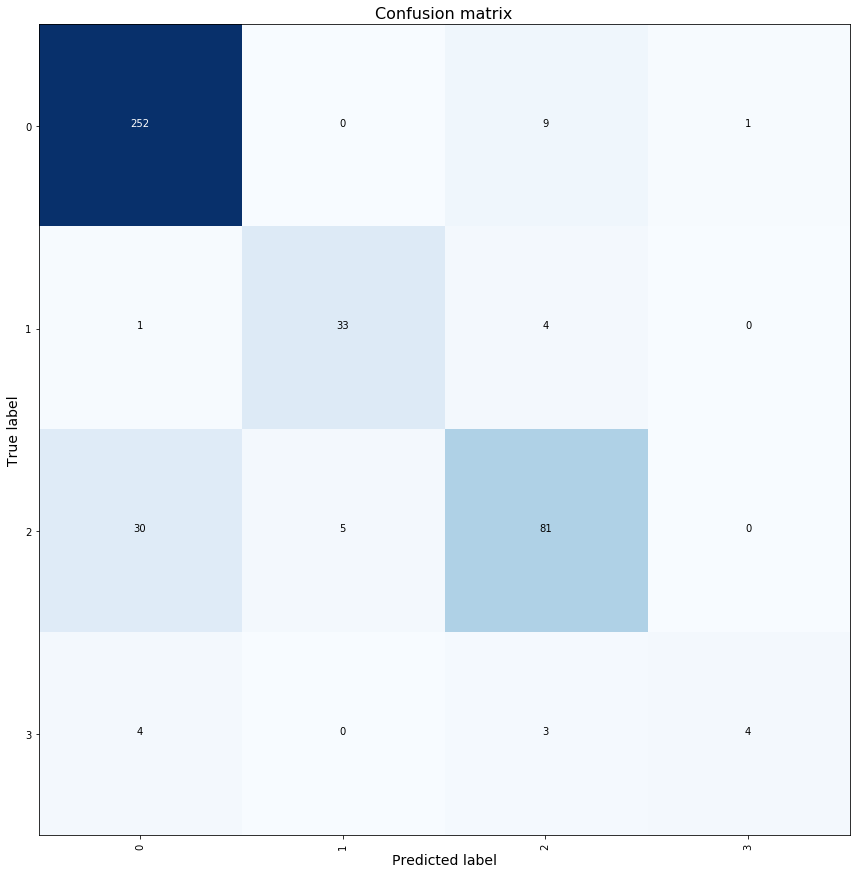

In [67]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv8v1.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)

In [ ]:
##### from keras.callbacks import EarlyStopping, ModelCheckpoint
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model_v6v11_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# checkpoint
filepath="weights.bestv6v11b.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', patience=150)
callbacks_list = [checkpoint, early_stopping]

# Fit the model
history = model.fit(X_train, y_1Hot_train, epochs=3000, validation_split=0.1 , callbacks=callbacks_list, shuffle=True, batch_size=18)


# serialize weights to HDF5
model.save_weights("weights_v6v11_layer_cnn.h5")
print("Saved model to disk")

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model_v6v10_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# checkpoint
filepath="weights.bestv6v10.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_acc', patience=150)
callbacks_list = [checkpoint, early_stopping]

# Fit the model
history = model.fit(X_train, y_1Hot_train, epochs=3000, validation_split=0.15 , callbacks=callbacks_list, shuffle=True, batch_size=18)


# serialize weights to HDF5
model.save_weights("weights_v6v10_layer_cnn.h5")
print("Saved model to disk")

In [ ]:

# serialize model to YAML
model_yaml = model.to_yaml()
with open("model_v6v11_layer_cnn.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("weights_v6v10_layer_cnn.h5")
print("Saved model to disk")

# load weights into new model
model.load_weights("C:\jupyter\weights.bestv6v11.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


Loaded model from disk
acc: 86.42%
             precision    recall  f1-score   support

          0       0.89      0.95      0.92       262
          1       0.89      0.87      0.88        38
          2       0.82      0.72      0.77       116
          3       0.75      0.55      0.63        11

avg / total       0.87      0.87      0.87       427



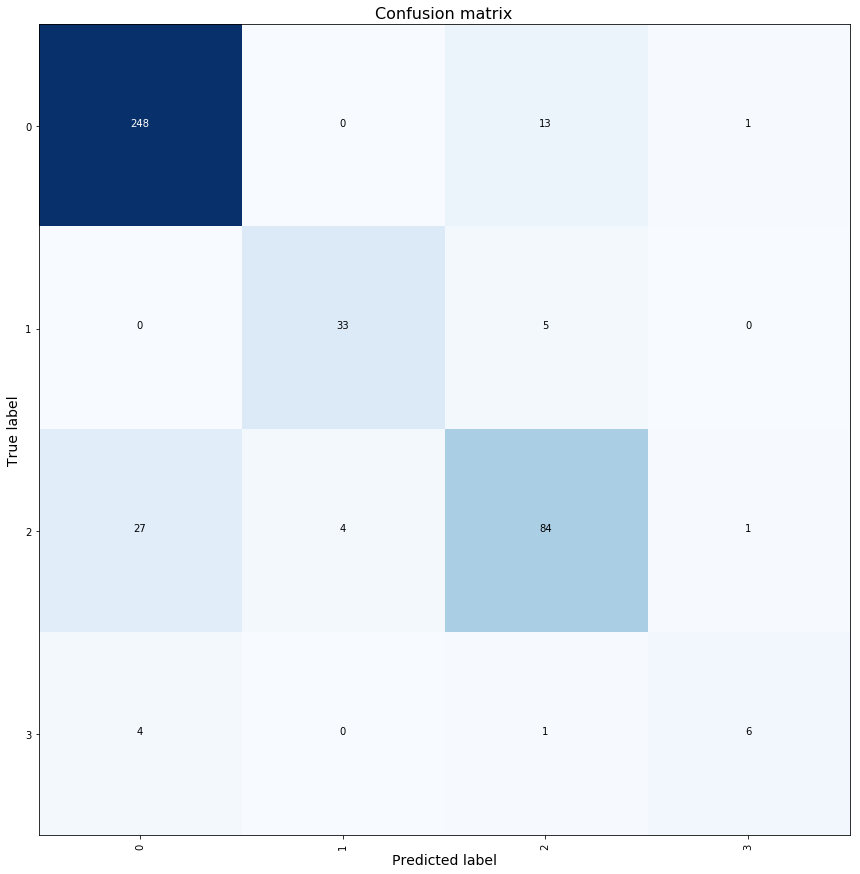

In [48]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv6v9.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


Loaded model from disk
acc: 88.06%
             precision    recall  f1-score   support

          0       0.88      0.95      0.92       262
          1       0.92      0.89      0.91        38
          2       0.86      0.73      0.79       116
          3       0.71      0.45      0.56        11

avg / total       0.87      0.88      0.87       427



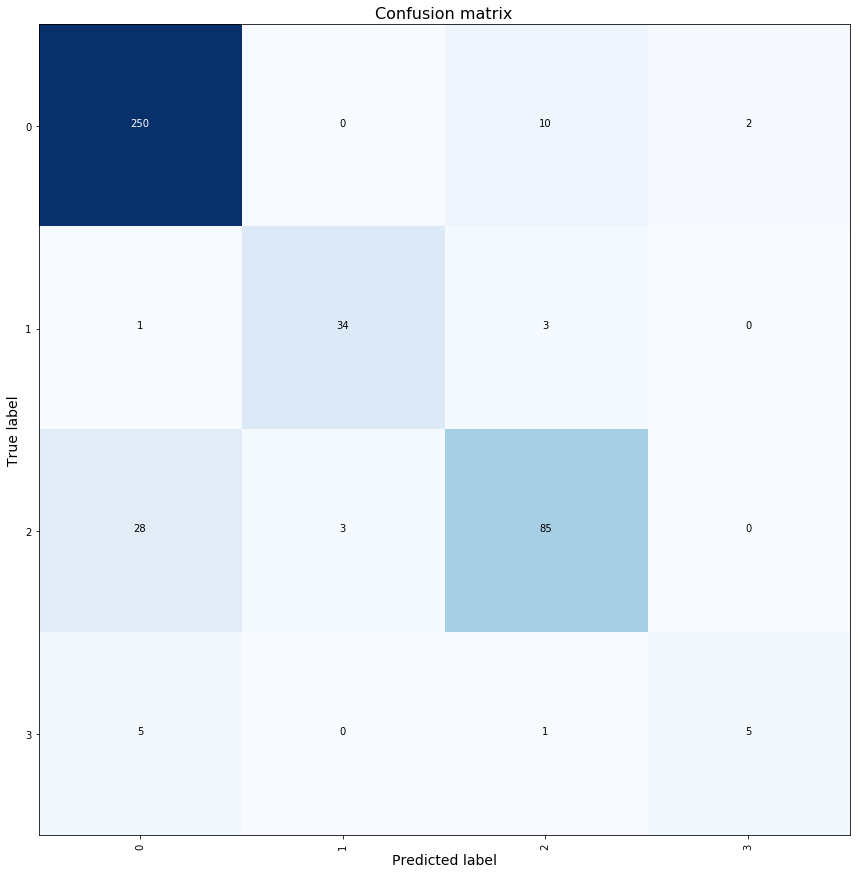

In [24]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv6v6.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


Loaded model from disk
acc: 86.64%
             precision    recall  f1-score   support

          0       0.87      0.97      0.92      1003
          1       0.83      0.80      0.81       162
          2       0.86      0.71      0.78       486
          3       0.84      0.49      0.62        55

avg / total       0.86      0.86      0.86      1706



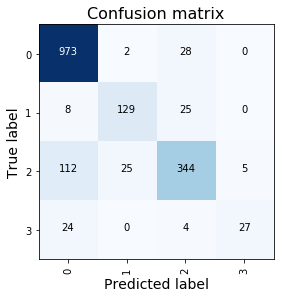

In [13]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv6v6.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


Loaded model from disk
acc: 86.17%
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1003
          1       0.91      0.73      0.81       162
          2       0.82      0.74      0.78       486
          3       0.74      0.53      0.62        55

avg / total       0.86      0.86      0.86      1706



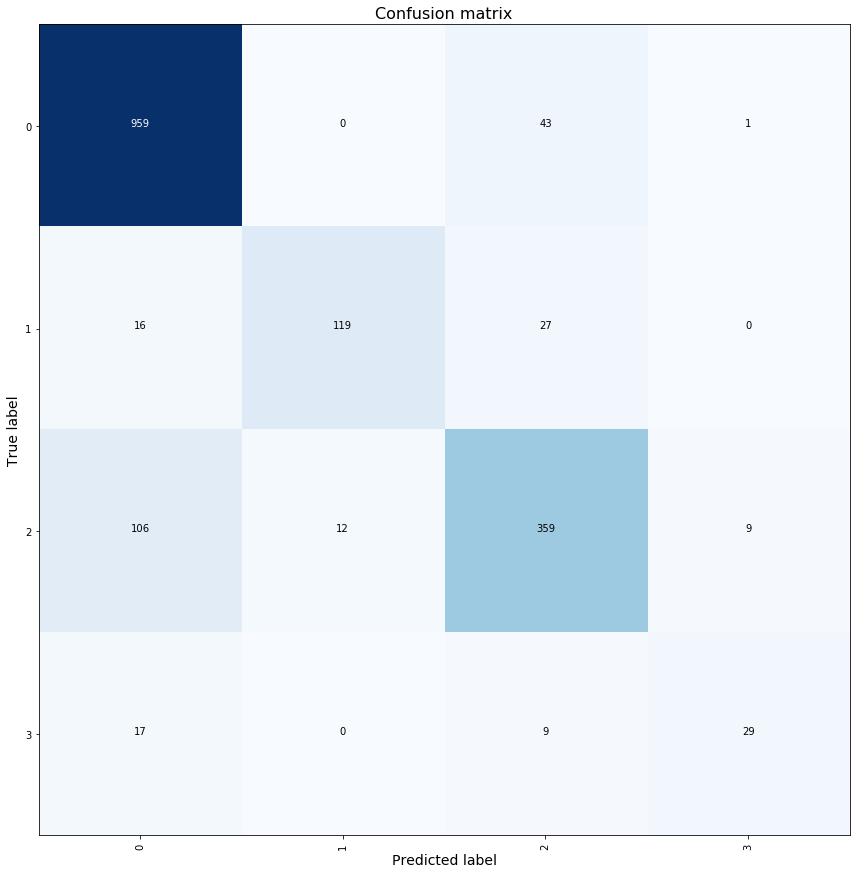

In [40]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv6v4.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


In [ ]:
# load weights into new model
model.load_weights("C:\jupyter\weights.bestv4v3.hdf5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


In [ ]:
# load weights into new model
model.load_weights("C:\jupyter\weights_v4v2_layer_cnn.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
trainScore = model.evaluate(X_train, y_1Hot_train, verbose=0)
print("TrainScore: \n%s: %.2f%%" % (model.metrics_names[1], trainScore[1]*100))
testScore = model.evaluate(X_test, y_1Hot_test, verbose=0)
print("TestScore: \n%s: %.2f%%" % (model.metrics_names[1], testScore[1]*100))

In [ ]:

y_true, y_pred = y_1Hot_test.astype('int'), model.predict(X_test)
y_pred = y_pred.round().astype('int')

# from categorial to lable indexing
y_pred = y_pred.argmax(1)
y_true = y_true.argmax(1)

print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred)


In [ ]:
model.summary()

In [ ]:
model.layers[30].output

In [ ]:
from keras import backend as K
def get_activations(model, layer, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()], model.layers[layer].output)
    activations = get_activations([X_batch,0])
    return activations

In [ ]:
get_3rd_layer_output = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[29].output])

# # output in test mode = 0
# layer_output = get_3rd_layer_output([X_train, 0])[0]

# output in train mode = 1

start = 0
while start <= len(X_train):
    end = start + 10
    layer_output = get_3rd_layer_output([X_train[start : end ], 1])[0]
    start = end

In [ ]:
layer_output.shape

In [ ]:
l0 = np.squeeze(layer_output, axis=0)

In [ ]:
l0.shape

In [ ]:
l1 = l0[0].flatten()

In [ ]:
l1.size

In [ ]:
c_batch = np.expand_dims(X_train[1], axis=0)
c_1 = model.predict(c_batch)

In [ ]:
def vis_c(cb):
    cv = np.squeeze(cb, axis=0)
    print(cv.shape)
    plt.show(cv)

In [ ]:
X2 = scaled_X.reshape(scaled_X.shape[0], scaled_X.shape[1], 1)

In [ ]:
X2.shape

In [ ]:
## Get output from layer 40

from keras.models import Model

print ("First layer:")
intermediate_layer_model = Model(input=model.input,output=model.layers[40].output)
l0 = intermediate_layer_model.predict(X2)

mast = []
for i in range(0,8528):
    l1 = l0[i].flatten()
    y0 = np.asarray([y[i]]).astype("int")
    ind = np.asarray([index[i]])
    abc = np.concatenate([ind, y0, l1])
    mast.append(abc)
    
mPd = pd.DataFrame(mast)
mPd.to_csv('output_cnnv2.csv', sep=',', header=False, index=False)